In [1]:
import numpy as np
import cv2
import zipfile
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
face_dataset = "C:/Users/asus/Desktop/archive.zip"
k_egienvector = 50

In [3]:
## Function to load our face dataset
def load_face_dataset(file_name):
    faces = {}
    with zipfile.ZipFile(file_name) as facezip:
        for filename in facezip.namelist():
            if not filename.endswith(".pgm"):
                continue # not a face picture
            with facezip.open(filename) as image:
                # If we extracted files from zip, we can use cv2.imread(filename) instead
                faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)
    return faces

In [4]:
## Check whether the dataset is loaded correctly
def display_dataset_face(faces,number=16):
    fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
    faceimages = list(faces.values())[-number:] # take last 16 images
    for i in range(16):
        axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
    plt.show()

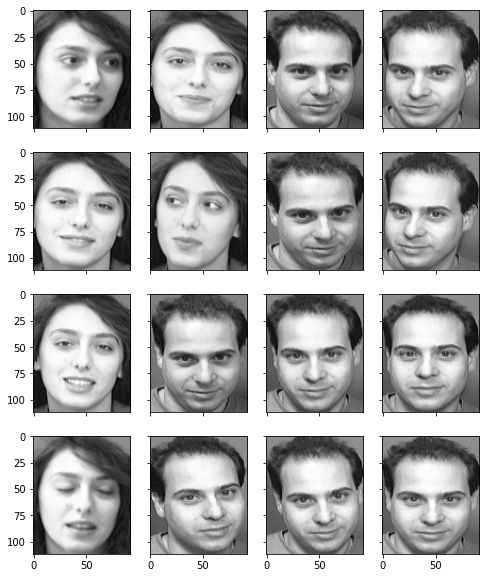

In [5]:
faces = load_face_dataset(face_dataset)
display_dataset_face(faces)

In [6]:
def face_martix(faces):
    facematrix = []
    facelabel = []
    for key,val in faces.items():
        if key.startswith("s40/"):
            continue # this is our test set
        if key == "s39/10.pgm":
            continue # this is our test set
        facematrix.append(val.flatten())
        facelabel.append(key.split("/")[0])
    
    # Create facematrix as (n_samples,n_pixels) matrix
    facematrix = np.array(facematrix)
    return facematrix

In [7]:
def PCA_fun(x,k):
    x = decentralization(x)
    conv_x = conv_martix(x)
    _, eigenvectors = np.linalg.eig(conv_x)
    # diag = np.diag(eigenvalues)
    return np.dot(x,eigenvectors),eigenvectors[:k]

In [8]:
def PCA_EIGENFACE(x,k):
    x = decentralization(x)
    conv_x = conv_martix(x)
    _, eigenvectors = np.linalg.eig(conv_x)
    # diag = np.diag(eigenvalues)
    print(eigenvectors.shape)
    return eigenvectors,eigenvectors[:k]
    # ret_val = np.zeros((,k))
    # for i in range(k):
        

In [9]:
def decentralization(x):
    return x-x.mean()

In [10]:
def conv_martix(x):
    return np.dot(x.T,x)

In [11]:
# facematrix = face_martix(faces)
# faceshape = list(faces.values())[0].shape
# print("start")
# pca_face = PCA(facematrix)
# print("stop")



In [12]:
facematrix = face_martix(faces)
#(Number of faces,img_h*img_w)
print(facematrix.shape)

faceshape = list(faces.values())[0].shape
print("start")
pca_face = PCA().fit(facematrix)
print("stop")
print("start")
pca_face_all,pca_face_k = PCA_EIGENFACE(facematrix,k_egienvector)
print("stop")
# print(pca_face0)

# Get first k vectors
egien_face = pca_face.components_[:k_egienvector]



(389, 10304)
start
stop
start
(10304, 10304)
stop


In [13]:
print(pca_face_k.shape)
print(egien_face.shape)

(50, 10304)
(50, 10304)


In [14]:
# fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
# for i in range(16):
#     axes[i%4][i//4].imshow(egien_face[i].reshape(faceshape), cmap="gray")
# plt.show()

In [18]:
print(facematrix-pca_face_all)

ValueError: operands could not be broadcast together with shapes (389,10304) (10304,10304) 

In [15]:
weights = egien_face @ (facematrix-pca_face.mean_).T
print(weights)
weights0 = pca_face_k @ (facematrix-pca_face_all.mean).T
print(weights0)

[[ 1511.48535017  2597.88183054  2953.26320132 ...  -927.15700457
   -819.38967273 -1339.26114916]
 [-1232.86110703 -1127.89904456  -955.03456257 ... -1002.13458397
  -1549.78240571 -1618.91616856]
 [ 1769.97865116   721.54563853  -653.71549028 ...  -902.22666737
   -487.72112891  -449.27986635]
 ...
 [ -251.5732153   -259.17783366   264.06537101 ...  -138.97324974
   -276.72898862  -117.63430902]
 [ -125.69294117    39.87298856    84.9869098  ...   194.26430432
     69.72315268   295.55525873]
 [    5.87542544  -163.11206295  -303.60175584 ...   -91.12910151
    -84.96728567  -199.93878707]]


TypeError: unsupported operand type(s) for -: 'int' and 'builtin_function_or_method'